In [18]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
  root = "data", 
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.FashionMNIST(
  root="data",
  train=False,
  transform=ToTensor(),
  download=True
)

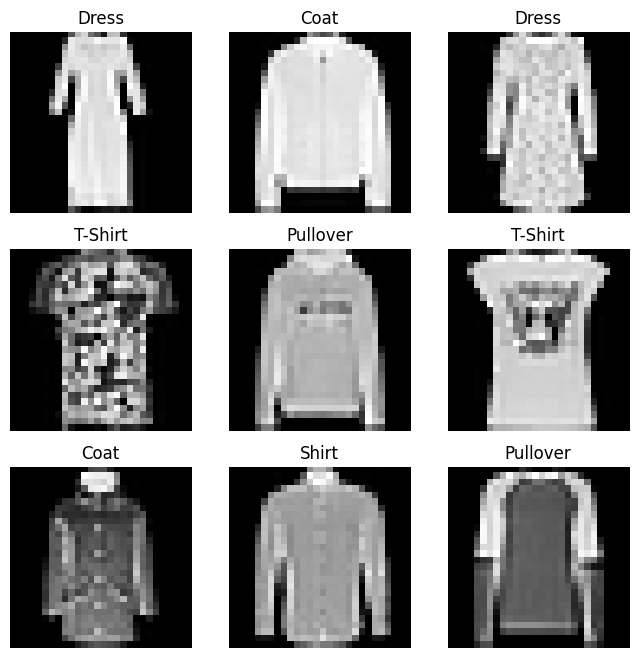

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
columns, rows = 3, 3
for i in range(1, columns * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  image, label = training_data[sample_idx]
  figure.add_subplot(rows, columns, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(image.squeeze(), cmap="gray")
plt.show()

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


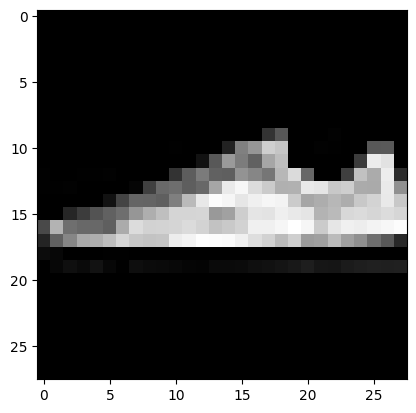

Label: Sneaker


In [16]:
train_features, train_labels = next(iter(train_dataloader))
print(f"features batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

In [19]:
ds = datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,
  transform=ToTensor(),
  target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)